In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import os
import pandas as pd
import seaborn as sns
import fiona
import sklearn

In [2]:
#Upload the selection
selection = []

with open('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/selecao.txt', 'r') as f:
    for line in f:
        selection.append(int(line.strip()))

common_years = np.arange(2005,2017,1)
common_years

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016])

In [3]:
path_to_tif = '/Users/francesco/Desktop/Data/GEOTIFFs/'
shapefile_path = '/Users/francesco/Desktop//Thesis/Data/ice_shelf.shp'

ids = []
Names = []
regions = []
areas = []
lats = []
lons = []


shapefile=fiona.open(shapefile_path)
print(shapefile.schema['properties'])

for feature in shapefile:


    id = feature['properties']['id']
    name=feature['properties']['name']
    area=feature['properties']['area_fra']
    lat = feature['properties']['latitude']
    lon = feature['properties']['longitude']
    geometry=feature['geometry']
    if geometry is None:
        continue
    region = feature['properties']['regions']

    #Taking the info
    ids.append(id)
    Names.append(name)
    regions.append(region)
    areas.append(area)
    lats.append(lat)
    lons.append(lon)

#Creating the dataframe
df_region = pd.DataFrame(index=ids)
df_region ['id'] = ids
df_region ['Name'] = Names
df_region ['Region'] = regions
df_region ['Area'] = areas
df_region ['Latitude'] = lats
df_region ['Longitude'] = lons

#Selecting the region and sorting the dataframe
df_region = df_region[df_region['id'].isin(selection)]
df_region = df_region.sort_values(by=['id'])
#drop id column
df_region = df_region.drop(['id'], axis=1)


{'id': 'int:10', 'name': 'str:30', 'regions': 'str:11', 'type': 'str:2', 'is_index': 'int:10', 'ice_shelf_': 'str:50', 'measures_n': 'str:50', 'latitude': 'float:24.15', 'longitude': 'float:24.15', 'thickness_': 'float:24.15', 'thicknes_1': 'float:24.15', 'smb_mean_9': 'float:24.15', 'smb_mean_1': 'float:24.15', 'ss_gl_flux': 'float:24.15', 'ss_gl_fl_1': 'float:24.15', 'ss_calving': 'float:24.15', 'ss_calvi_1': 'float:24.15', 'model_gl_f': 'float:24.15', 'instant_co': 'float:24.15', 'mass_loss_': 'float:24.15', 'mass_los_1': 'float:24.15', 'mass_los_2': 'float:24.15', 'mass_los_3': 'float:24.15', 'mass_los_4': 'float:24.15', 'mass_los_5': 'float:24.15', 'mass_los_6': 'float:24.15', 'mass_los_7': 'float:24.15', 'mass_los_8': 'float:24.15', 'mass_los_9': 'float:24.15', 'mass_los10': 'float:24.15', 'mass_los11': 'float:24.15', 'mass_los12': 'float:24.15', 'mass_los13': 'float:24.15', 'mass_los14': 'float:24.15', 'mass_los15': 'float:24.15', 'mass_los16': 'float:24.15', 'mass_los17': 'floa

In [4]:
df_region

,Name,Region,Area,Latitude,Longitude
2,Philbin_Inlet,West,91091726,-74.024590,-114.071942
3,Walgreen_Coast_2,West,14268452,-73.692759,-101.681159
4,Jackson,West,60697475,-74.714204,-135.776355
6,LarsenD,Peninsula,22491551983,-68.878273,-62.031823
7,LarsenF,Peninsula,828398967,-74.187784,-60.955625
...,...,...,...,...,...
164,Walgreen_Coast_1,West,89240393,-73.962582,-101.757949
166,Holt,Islands,57721004,-74.670593,-110.345355
169,Perkins,West,7158091,-74.921711,-136.726253
170,Garfield,West,30309162,-75.023213,-136.941592


In [5]:
#Loading the dataset


# Basal Melting
bm = pd.read_csv('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/bm.csv', index_col=0)
bm = bm.sort_values(by=['id']) #sorting the glaciers by their index
bm = bm.loc[bm.index.isin(selection)] #selecting the glaciers, according to their index
bm = bm[common_years.astype(str)] #selecting the common years

#Load the calving data
calving = pd.read_csv('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/calving_tif_df_cum.csv', index_col=0)
calving = calving.loc[calving.index.isin(selection)]
calving = calving[common_years.astype(str)]

#Load the ice concentration data
i_c = pd.read_csv('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/ice_concentration.csv', index_col=0)
i_c = i_c.loc[i_c.index.isin(selection)]
i_c = i_c[common_years.astype(str)]

#Load the ice velocity data
i_v = pd.read_csv('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/velocity_filled.csv', index_col=0)
i_v = i_v.loc[i_v.index.isin(selection)]
i_v = i_v[common_years.astype(str)]

#Load the potential temperature data
p_t = pd.read_csv('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/PT_time_serie.csv', index_col=0)
p_t = p_t.loc[p_t.index.isin(selection)]
p_t = p_t[common_years.astype(str)]

#Load the salinity data
sal = pd.read_csv('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/S_time_serie.csv', index_col=0)
sal = sal.loc[sal.index.isin(selection)]
sal = sal[common_years.astype(str)]

#Load the ice thickness data
i_t = pd.read_csv('/Users/francesco/Desktop/Thesis/Data/dataset_filtered' + '/thickness_avg.csv', index_col=0)
i_t = i_t.loc[i_t.index.isin(selection)]
i_t = i_t[common_years.astype(str)]


index = bm.index

In [25]:
#RUN JUST ONCE

#make a dataset with all the variables
dataset = pd.concat([bm, calving, i_c, i_v, p_t, sal, i_t], axis=1, keys=['bm', 'calving', 'i_c', 'i_v', 'p_t', 'sal', 'i_t'])
dataset.columns.names = ['Variables', 'Years']
dataset.index.names = ['Glaciers']

#i want to split the dataset in two, one with the variables and one with the target. The target is ice calving
dataset_target = dataset['calving']
dataset_variables = dataset.drop(['calving'], axis=1)

array([[<Axes: title={'center': "('bm', '2005')"}>,
        <Axes: title={'center': "('bm', '2006')"}>,
        <Axes: title={'center': "('bm', '2007')"}>,
        <Axes: title={'center': "('bm', '2008')"}>,
        <Axes: title={'center': "('bm', '2009')"}>,
        <Axes: title={'center': "('bm', '2010')"}>,
        <Axes: title={'center': "('bm', '2011')"}>,
        <Axes: title={'center': "('bm', '2012')"}>],
       [<Axes: title={'center': "('bm', '2013')"}>,
        <Axes: title={'center': "('bm', '2014')"}>,
        <Axes: title={'center': "('bm', '2015')"}>,
        <Axes: title={'center': "('bm', '2016')"}>,
        <Axes: title={'center': "('i_c', '2005')"}>,
        <Axes: title={'center': "('i_c', '2006')"}>,
        <Axes: title={'center': "('i_c', '2007')"}>,
        <Axes: title={'center': "('i_c', '2008')"}>],
       [<Axes: title={'center': "('i_c', '2009')"}>,
        <Axes: title={'center': "('i_c', '2010')"}>,
        <Axes: title={'center': "('i_c', '2011')"}>,
   

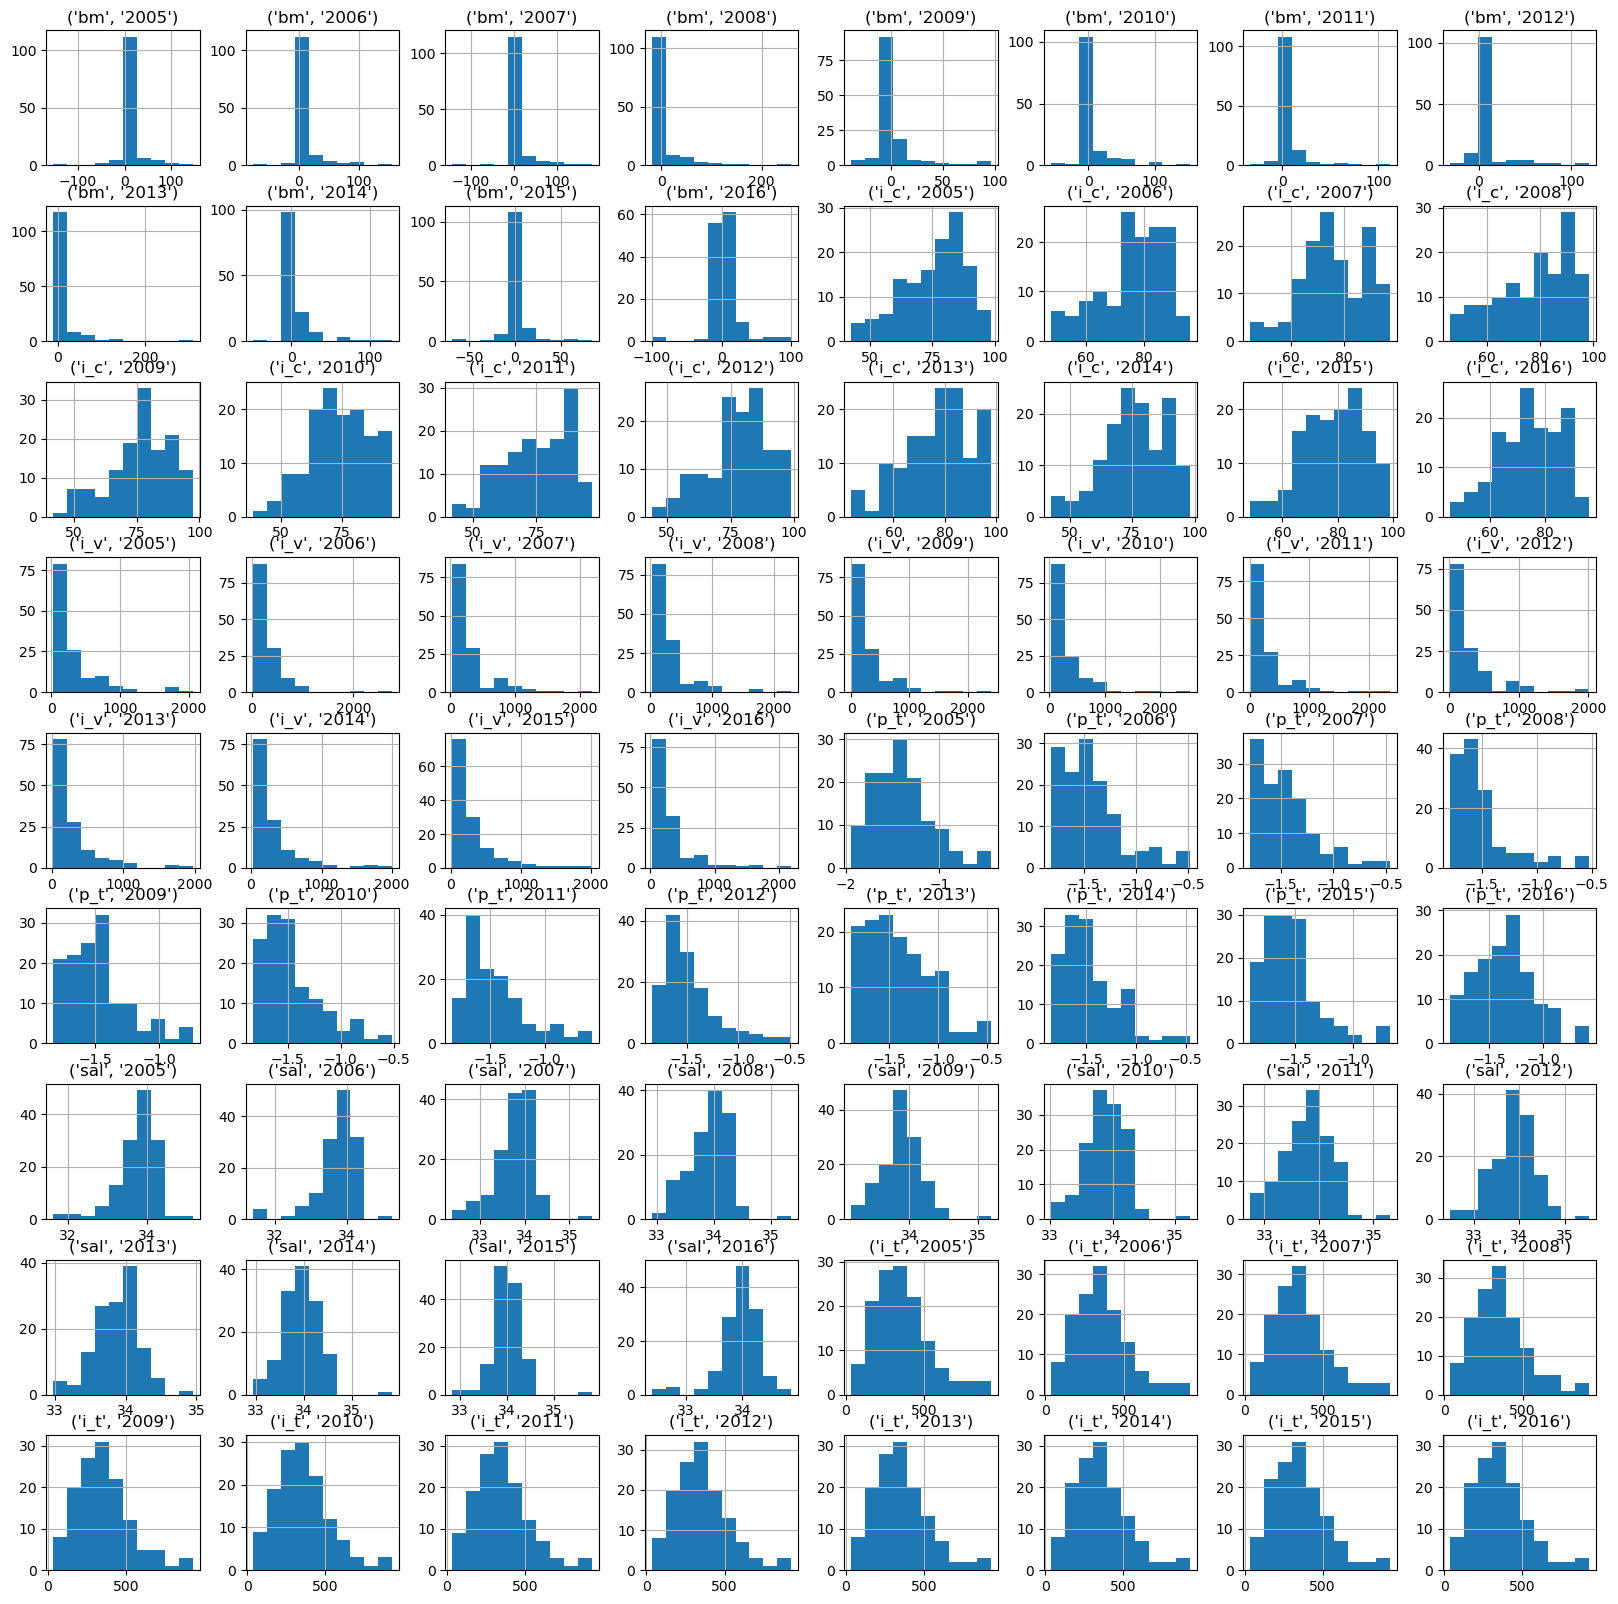

In [27]:
dataset_variables.hist(figsize=(20,20))

In [44]:
134/3*2*4/5

71.46666666666667

In [26]:
#Now i want to split both the dataset in train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_variables, dataset_target, test_size=0.3, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
np.shape(X_train_scaled)

(93, 72)

In [20]:
#In this block i want to define a custom loss function, that penalize more the negative values

from sklearn.metrics import mean_squared_error


def custom_loss(y_true, y_pred):

    mse_positive = mean_squared_error(y_true[y_true>=0], y_pred[y_true>=0])

    mse_negative = 100*mean_squared_error(y_true[y_true<0], y_pred[y_true<0])

    return mse_positive + mse_negative


custom_scorer = sklearn.metrics.make_scorer(custom_loss, greater_is_better=False)

In [41]:
#Now pwerform the cross validation on the training set
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


#Define the cross validation method
cv = KFold(n_splits=5, random_state=42, shuffle=True)

#Define the elastic net
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=5, l1_ratio=0.5, random_state=42, max_iter=100000)

#Perform the cross validation
scores = cross_validate(model, X_train, y_train, cv=cv, return_train_score=True)

#find the grid search
from sklearn.model_selection import GridSearchCV

#Define the grid search

param_grid = {'alpha': [0.1, 1, 5, 10, 20, 50, 100, 200, 500, 1000],
                'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=custom_scorer, return_train_score=True)





In [42]:
scores

{'fit_time': array([0.42425919, 0.5695219 , 1.195786  , 0.24645829, 0.40587115]),
 'score_time': array([0.00264192, 0.00285411, 0.00317001, 0.00248194, 0.00231409]),
 'test_score': array([ 0.80310699, -7.9128318 ,  0.8184411 , -0.0169023 ,  0.43527815]),
 'train_score': array([0.97776842, 0.98135256, 0.96642104, 0.98957973, 0.9816082 ])}

In [9]:
y_test.iloc[1]

Years
2005    0.14
2006    0.05
2007    0.05
2008    0.13
2009    0.00
2010    0.07
2011    0.02
2012    0.11
2013    0.12
2014    0.00
2015    0.00
2016    0.25
Name: 85.0, dtype: float64

In [10]:
y_pred[1]

type: name 'y_pred' is not defined

In [ ]:
block

In [ ]:
#lets merge all the data in order to have touples of coupled variables, like `T and Ice thickness, and then kind of plot them in the graph having the touples which are the 2 associated variables for ALL Glaciers, for all time

#create this vector

listone = []


for variable in [bm, calving, i_c, i_v, p_t, sal, i_t]:

    list_tmp = []

    for year in common_years:
        
        for id in index:

            list_tmp.append(variable.loc[id][str(year)])

    listone.append(list_tmp)


#inrerestingly the correlation matrix does not change if i invert time and id



In [ ]:
print(np.shape(listone))

(7, 1608)


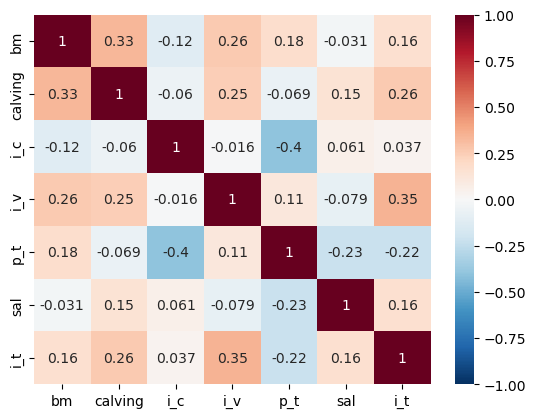

In [ ]:
#Now calculate the correlation between the variables

#Create a dataframe with the variables
df = pd.DataFrame(listone).T

df.columns = ['bm', 'calving', 'i_c', 'i_v', 'p_t', 'sal', 'i_t']

#Calculate the correlation
corr = df.corr()

#Plot the correlation in a diverginf scale
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdBu_r",
            vmin=-1,
            vmax=1,
            center=0,
            annot=True)

#save the figure
plt.savefig(os.getcwd() + '/correlation.png', dpi=300, bbox_inches='tight')

In [ ]:
# i now want to see a little bit the statistic of the variables

df.describe()


,bm,calving,i_c,i_v,p_t,sal,i_t
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,6.978800,6.316741,76.465846,297.978935,-1.450441,33.861338,356.782279
std,24.663117,21.391140,12.377043,350.401553,0.284360,0.409553,175.179469
min,-152.960000,0.000000,38.371566,4.181534,-1.937779,31.399134,35.200962
25%,-0.030000,0.000000,68.289337,93.056370,-1.660133,33.667563,229.985425
50%,0.310000,0.160000,77.546904,164.631640,-1.511645,33.894396,330.164460
75%,4.312500,1.715000,86.278982,354.629452,-1.303772,34.129790,459.792485
max,308.060000,216.376764,99.000000,2769.026400,-0.451604,35.836117,933.821660


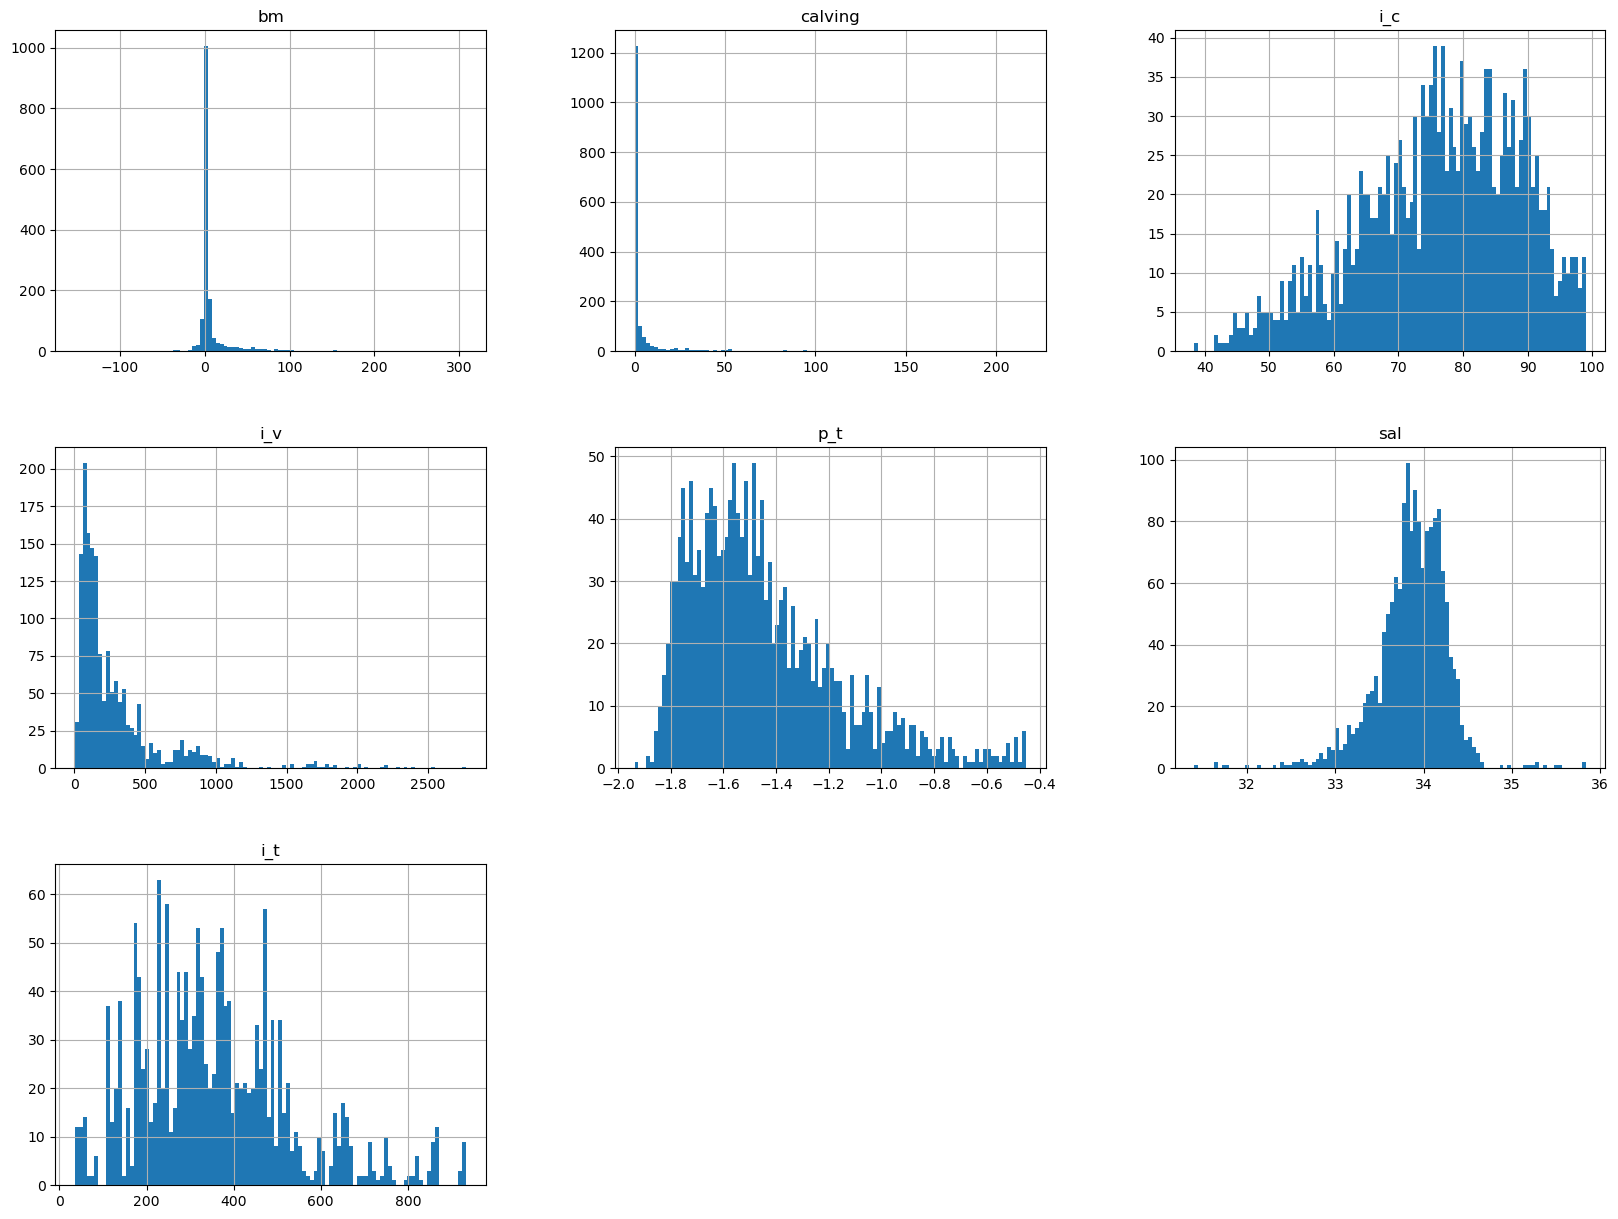

In [ ]:
df.hist(bins=100, figsize=(20,15))

#find the average and add it to the plot

#save the figure
plt.savefig(os.getcwd() + '/mean.png', dpi=300, bbox_inches='tight')

array([[<Axes: xlabel='bm', ylabel='bm'>,
        <Axes: xlabel='calving', ylabel='bm'>,
        <Axes: xlabel='i_c', ylabel='bm'>,
        <Axes: xlabel='i_v', ylabel='bm'>,
        <Axes: xlabel='p_t', ylabel='bm'>,
        <Axes: xlabel='sal', ylabel='bm'>,
        <Axes: xlabel='i_t', ylabel='bm'>],
       [<Axes: xlabel='bm', ylabel='calving'>,
        <Axes: xlabel='calving', ylabel='calving'>,
        <Axes: xlabel='i_c', ylabel='calving'>,
        <Axes: xlabel='i_v', ylabel='calving'>,
        <Axes: xlabel='p_t', ylabel='calving'>,
        <Axes: xlabel='sal', ylabel='calving'>,
        <Axes: xlabel='i_t', ylabel='calving'>],
       [<Axes: xlabel='bm', ylabel='i_c'>,
        <Axes: xlabel='calving', ylabel='i_c'>,
        <Axes: xlabel='i_c', ylabel='i_c'>,
        <Axes: xlabel='i_v', ylabel='i_c'>,
        <Axes: xlabel='p_t', ylabel='i_c'>,
        <Axes: xlabel='sal', ylabel='i_c'>,
        <Axes: xlabel='i_t', ylabel='i_c'>],
       [<Axes: xlabel='bm', ylabel='i_v'>,


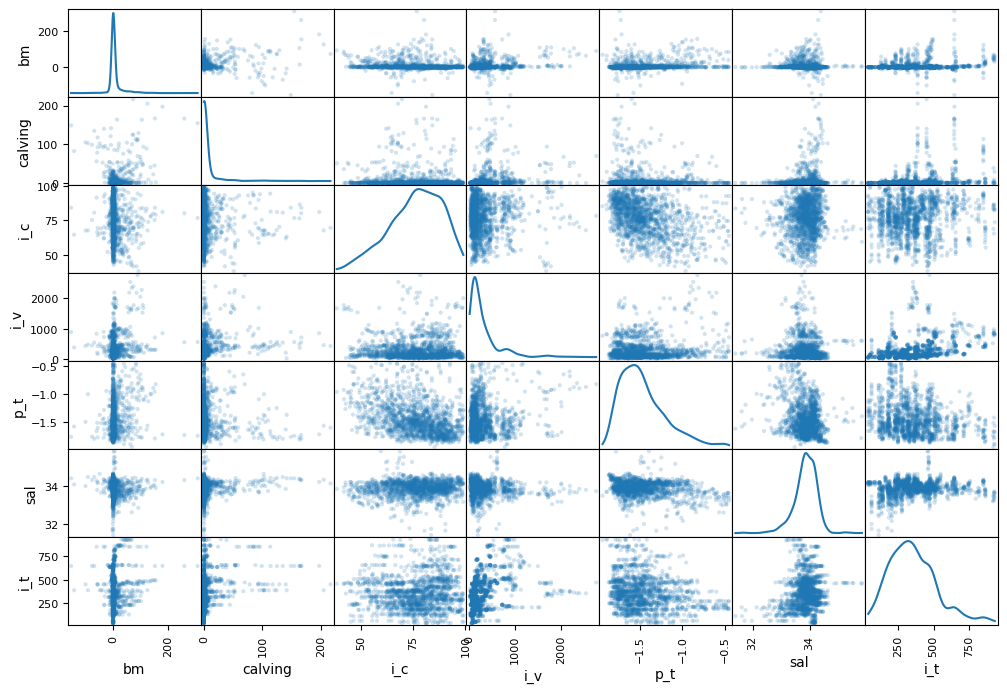

In [ ]:
attributes = ['bm', 'calving', 'i_c', 'i_v', 'p_t', 'sal', 'i_t']

from pandas.plotting import scatter_matrix

scatter_matrix(df[attributes], figsize=(12, 8), diagonal='kde', alpha=0.2)


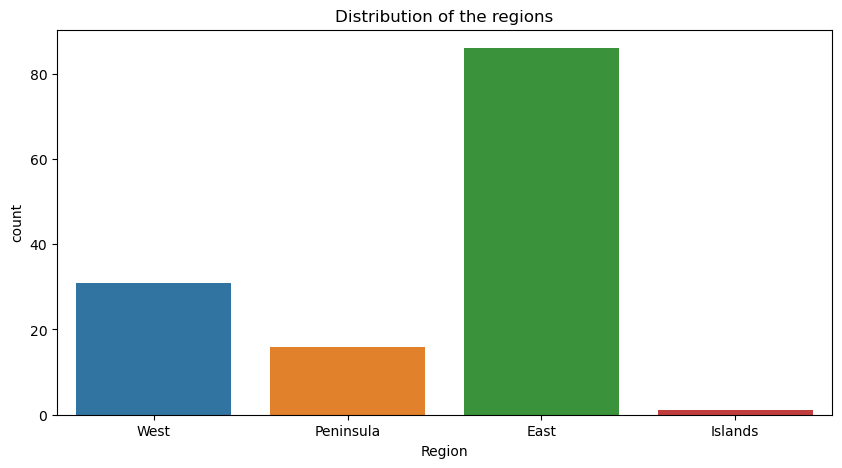

/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11968/867117731.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_region['Area'], bins=100)


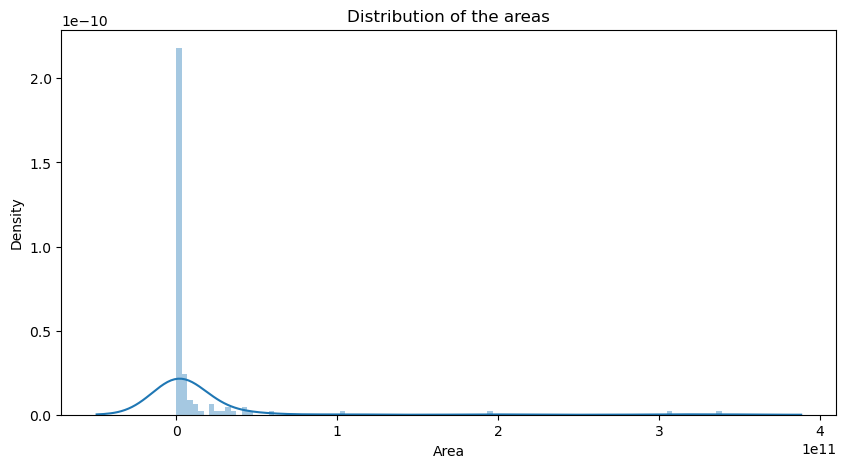

The number of glaciers in the west region is: 31 
The number of glaciers in the east region is: 86 
The number of glaciers in the peninsula region is: 16 
The number of glaciers in the island region is: 0


In [ ]:
#Plotting the distribution of the regions
plt.figure(figsize=(10,5))
sns.countplot(x='Region', data=df_region)
plt.title('Distribution of the regions')
plt.show()

#Plotting the distribution of the areas
plt.figure(figsize=(10,5))
sns.distplot(df_region['Area'], bins=100)
plt.title('Distribution of the areas')
plt.show()

# Now i want to group the ids by the region
west = df_region[df_region['Region'] == 'West']
east = df_region[df_region['Region'] == 'East']
peninsula = df_region[df_region['Region'] == 'Peninsula']
island = df_region[df_region['Region'] == 'Island']

west_index = west.index
east_index = east.index
peninsula_index = peninsula.index
island_index = island.index

print('The number of glaciers in the west region is: ' + str(len(west_index)), '\n'
      'The number of glaciers in the east region is: ' + str(len(east_index)), '\n'
        'The number of glaciers in the peninsula region is: ' + str(len(peninsula_index)), '\n'
            'The number of glaciers in the island region is: ' + str(len(island_index)))

## Regional studies

(7, 192)


,bm,calving,i_c,i_v,p_t,sal,i_t
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,9.848594,2.278613,74.844396,255.243145,-1.207183,33.567212,229.459484
std,21.274187,7.161095,14.719486,247.806403,0.488159,0.712875,101.237540
min,-30.390000,0.000000,44.254402,18.691137,-1.866027,31.399134,58.928974
25%,-0.010000,0.000000,64.150463,131.330533,-1.719286,33.100309,169.336123
50%,0.780000,0.069202,75.250000,189.599613,-1.110486,33.542900,202.672330
75%,9.322500,0.857500,88.188411,263.128248,-0.775844,34.321157,285.384172
max,101.100000,49.740000,97.395956,1534.921600,-0.451604,34.632801,482.216300


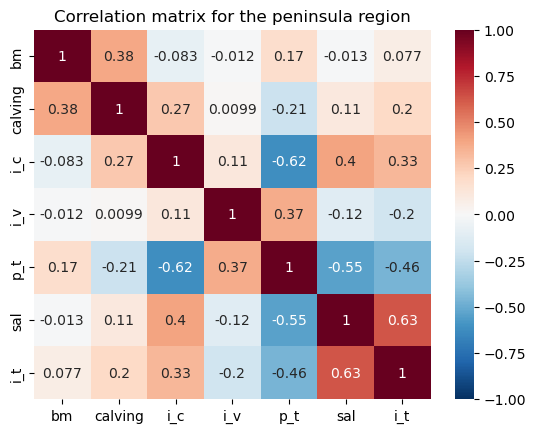

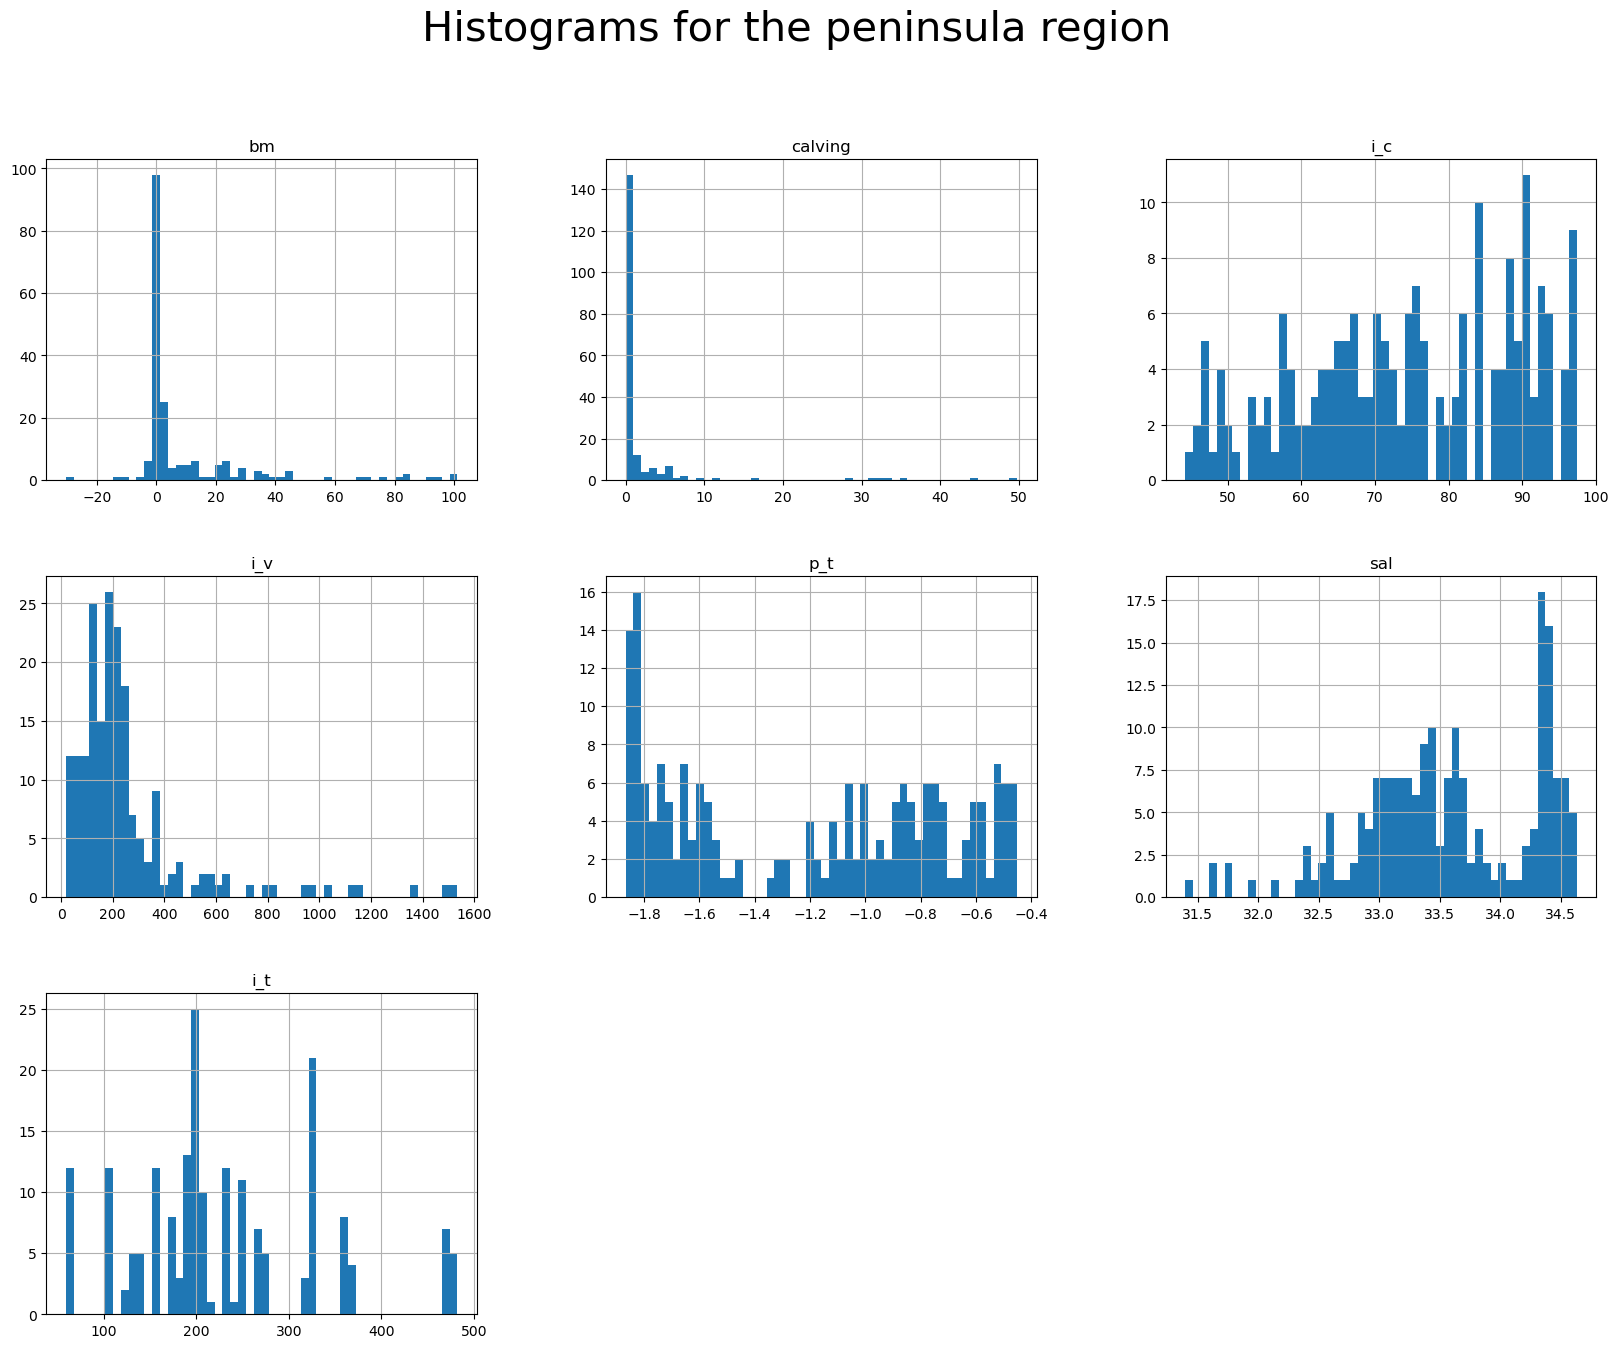

In [ ]:
#We now try to reorganize accordinag to the regions

#Change index to change the region of interest [west, east, peninsula, island]
index = peninsula_index
name = 'peninsula'

bm_region = bm.loc[bm.index.isin(index)]
calving_region = calving.loc[calving.index.isin(index)]
i_c_region = i_c.loc[i_c.index.isin(index)]
i_v_region = i_v.loc[i_v.index.isin(index)]
p_t_region = p_t.loc[p_t.index.isin(index)]
sal_region = sal.loc[sal.index.isin(index)]
i_t_region = i_t.loc[i_t.index.isin(index)]


listone_region = []

for variable in [bm_region, calving_region, i_c_region, i_v_region, p_t_region, sal_region, i_t_region]:

    list_tmp = []

    for year in common_years:
        
        for id in index:

            list_tmp.append(variable.loc[id][str(year)])

    listone_region.append(list_tmp)

print(np.shape(listone_region))

df_one_region = pd.DataFrame(listone_region).T

df_one_region.columns = ['bm', 'calving', 'i_c', 'i_v', 'p_t', 'sal', 'i_t']

#Calculate the correlation
corr = df_one_region.corr()

#Plot the correlation in a diverginf scale
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdBu_r",
            vmin=-1,
            vmax=1,
            center=0,
            annot=True)

#save the figure
plt.title('Correlation matrix for the ' + name + ' region')
plt.savefig(os.getcwd() + '/correlation_' + name + '_region.png', dpi=300, bbox_inches='tight')

df_one_region.hist(bins=50, figsize=(20,15))
#add a title
plt.suptitle('Histograms for the ' + name + ' region', fontsize=30)
#save the figure
plt.savefig(os.getcwd() + '/histogram_for_' + name + '_region.png', dpi=300, bbox_inches='tight')

df_one_region.describe()

## Here we add also areas, alt and lon

In [ ]:
common_years_repeated = np.repeat(common_years, len(index))
for year in common_years_repeated:
    print(year)
print(np.shape(common_years_repeated))

2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2009
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2010
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2011
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2013
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2015
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
(192,)


In [ ]:
#regional studies

# i want to replicate the list region 12 times, one on the top of the other, in order to have a list which  has size 1608

area_repeated = np.tile(df_region['Area'].values, 12)
id_repeated = np.tile(df_region.index, 12)
lat_repeated = np.tile(df_region['Latitude'].values, 12)
lon_repeated = np.tile(df_region['Longitude'].values, 12)

common_years_repeated = np.repeat(common_years, len(bm.index)) #the order of the years is differnt because of how we builded the listone


listone_2 = listone.copy()
listone_2.append(area_repeated)
listone_2.append(lat_repeated)
listone_2.append(lon_repeated)
#listone_2.append(common_years_repeated)

print(np.shape(listone_2))


(10, 1608)


array([[<Axes: title={'center': 'bm'}>,
        <Axes: title={'center': 'calving'}>,
        <Axes: title={'center': 'i_c'}>],
       [<Axes: title={'center': 'i_v'}>, <Axes: title={'center': 'p_t'}>,
        <Axes: title={'center': 'sal'}>],
       [<Axes: title={'center': 'i_t'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lon'}>, <Axes: >, <Axes: >]],
      dtype=object)

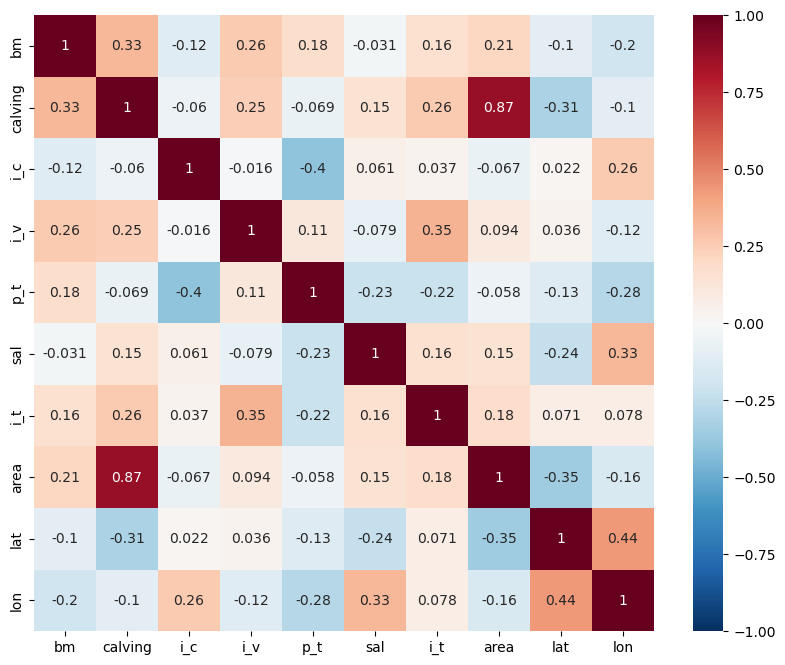

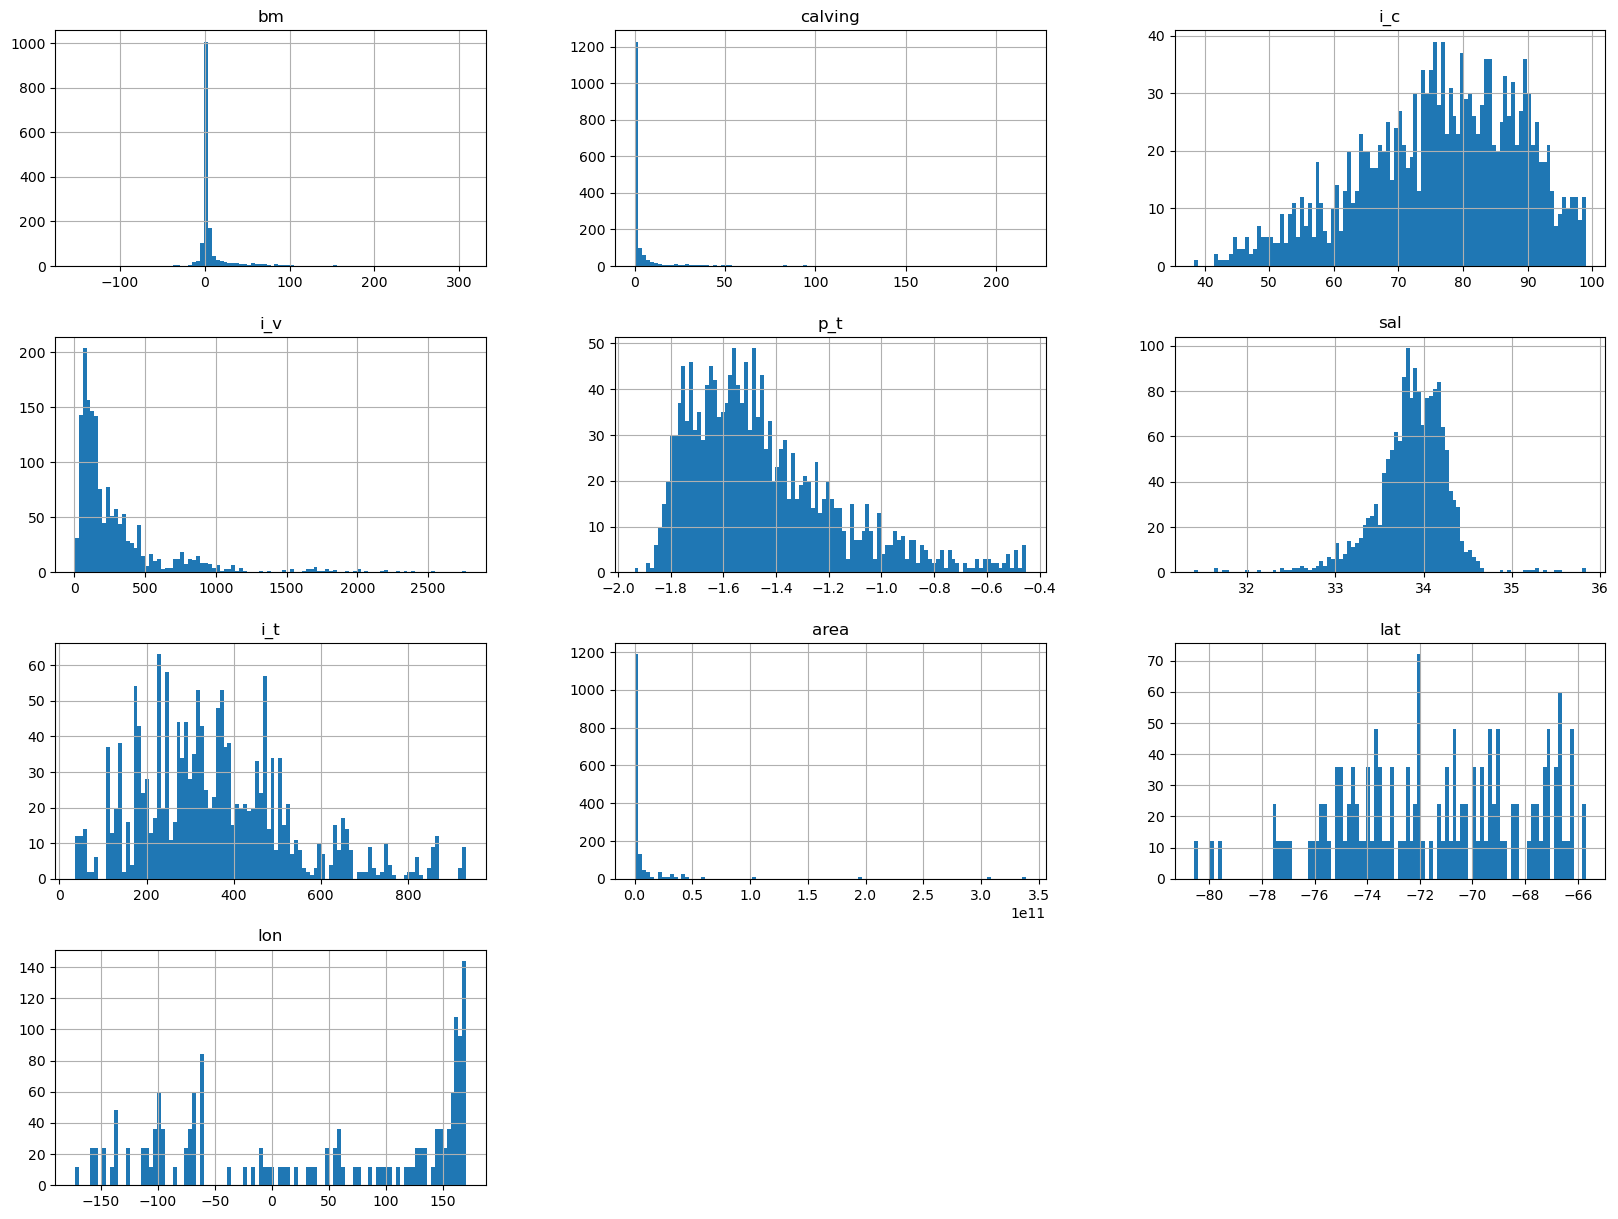

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe with the variables
df_2 = pd.DataFrame(listone_2).T
df_2.columns = ['bm', 'calving', 'i_c', 'i_v', 'p_t', 'sal', 'i_t', 'area', 'lat', 'lon']

# Calculate the correlation
corr = df_2.corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Plot the correlation in a diverging scale
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdBu_r",
            vmin=-1,
            vmax=1,
            center=0,
            annot=True,
            annot_kws={"fontsize": 10})  # Adjust font size of annotations

# Set tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the figure
plt.savefig(os.getcwd() + '/correlation_2.png', dpi=300, bbox_inches='tight')

df_2.hist(bins=100, figsize=(20, 15))


array([[<Axes: xlabel='bm', ylabel='bm'>,
        <Axes: xlabel='calving', ylabel='bm'>,
        <Axes: xlabel='i_c', ylabel='bm'>,
        <Axes: xlabel='i_v', ylabel='bm'>,
        <Axes: xlabel='p_t', ylabel='bm'>,
        <Axes: xlabel='sal', ylabel='bm'>,
        <Axes: xlabel='i_t', ylabel='bm'>,
        <Axes: xlabel='area', ylabel='bm'>,
        <Axes: xlabel='lat', ylabel='bm'>,
        <Axes: xlabel='lon', ylabel='bm'>],
       [<Axes: xlabel='bm', ylabel='calving'>,
        <Axes: xlabel='calving', ylabel='calving'>,
        <Axes: xlabel='i_c', ylabel='calving'>,
        <Axes: xlabel='i_v', ylabel='calving'>,
        <Axes: xlabel='p_t', ylabel='calving'>,
        <Axes: xlabel='sal', ylabel='calving'>,
        <Axes: xlabel='i_t', ylabel='calving'>,
        <Axes: xlabel='area', ylabel='calving'>,
        <Axes: xlabel='lat', ylabel='calving'>,
        <Axes: xlabel='lon', ylabel='calving'>],
       [<Axes: xlabel='bm', ylabel='i_c'>,
        <Axes: xlabel='calving', ylab

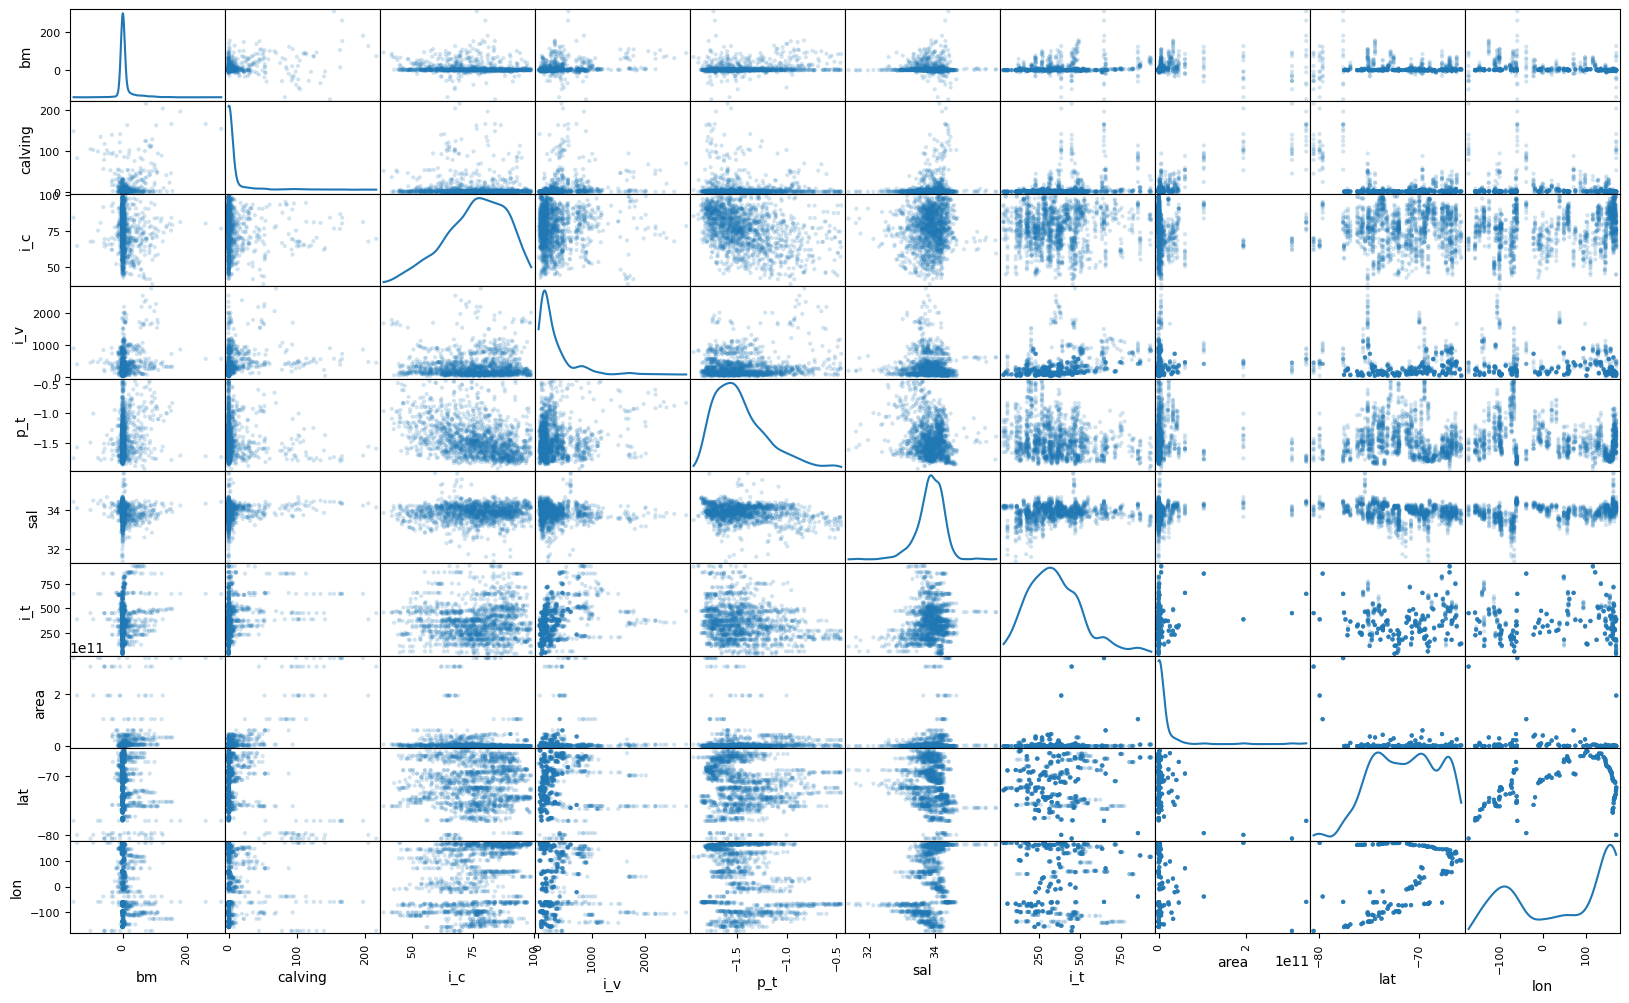

In [ ]:
attributes = ['bm', 'calving', 'i_c', 'i_v', 'p_t', 'sal', 'i_t', 'area', 'lat', 'lon']

from pandas.plotting import scatter_matrix

scatter_matrix(df_2[attributes], figsize=(20, 12), diagonal='kde', alpha=0.2)

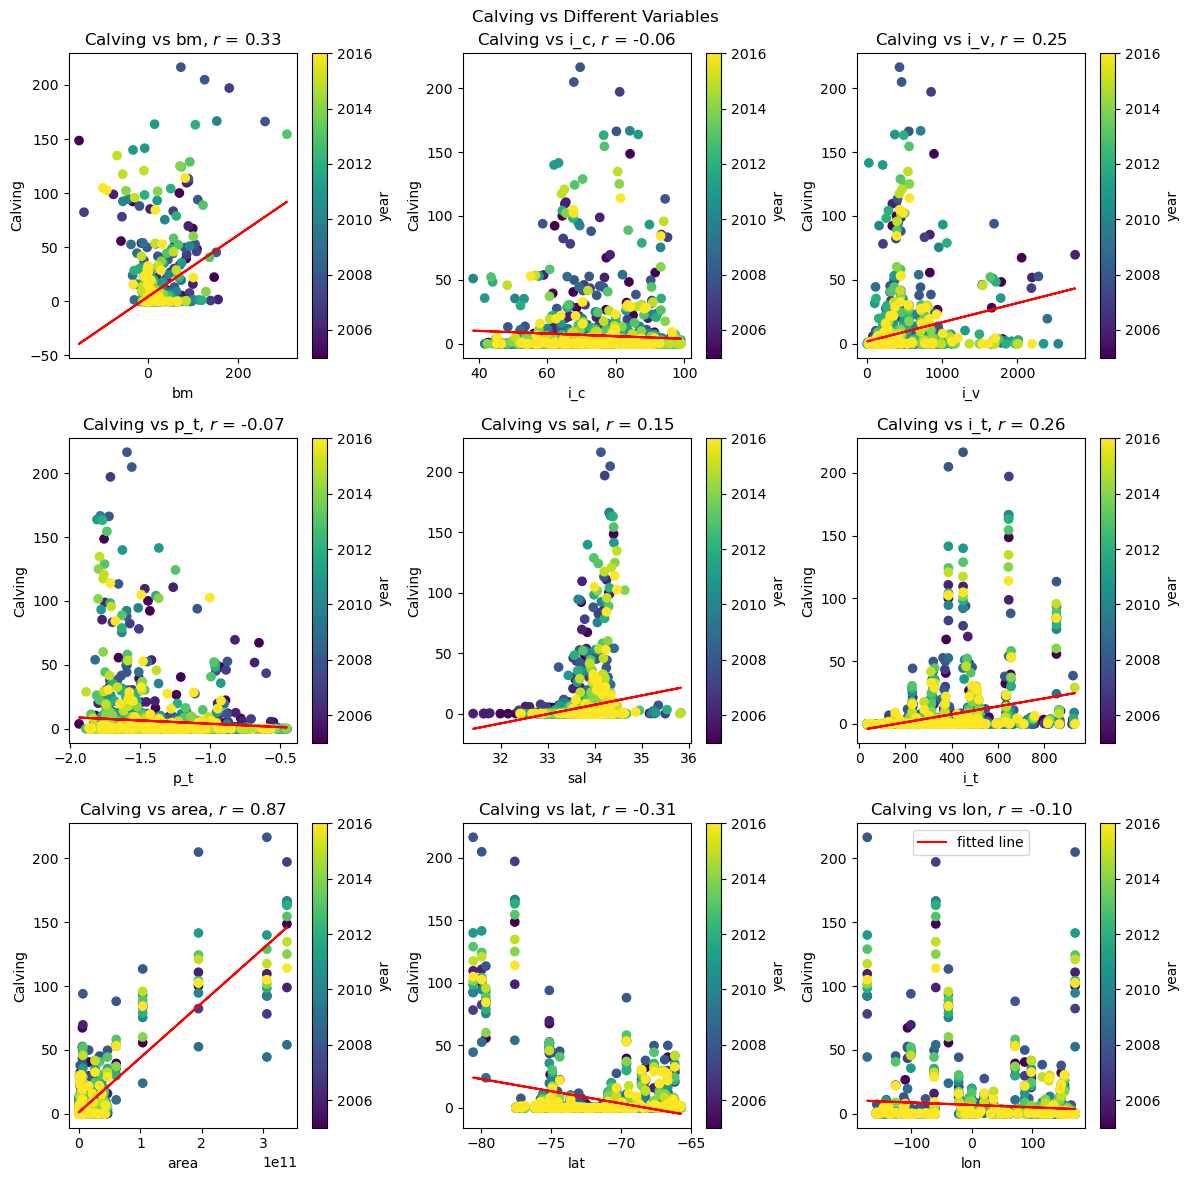

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define the variables for plotting
variables = ['bm', 'i_c', 'i_v', 'p_t', 'sal', 'i_t', 'area', 'lat', 'lon']

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.suptitle('Calving vs Different Variables')

# Iterate over the variables and create scatter plots
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    
    #r coefficient
    r = np.corrcoef(df_2[var], df_2['calving'])[0, 1] 

    # Create scatter plot
    scatter_plot = axes[row, col].scatter(df_2[var], df_2['calving'], c=common_years_repeated, cmap='viridis')
    
    # Add linear regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_2[var], df_2['calving'])
    axes[row, col].plot(df_2[var], intercept + slope * df_2[var], 'r', label='fitted line')
    
    # Set subplot title
    axes[row, col].set_title(f'Calving vs {var}, $r$ = {r:.2f}')
    
    # Set x-axis and y-axis labels
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Calving')
    
    # Add colorbar
    colorbar = plt.colorbar(scatter_plot, ax=axes[row, col])
    colorbar.set_label('year')

# Adjust spacing between subplots
plt.tight_layout()

# Show the legend
plt.legend()

# Display the figure
plt.show()



/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11968/3688114815.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(areas, bins=150)


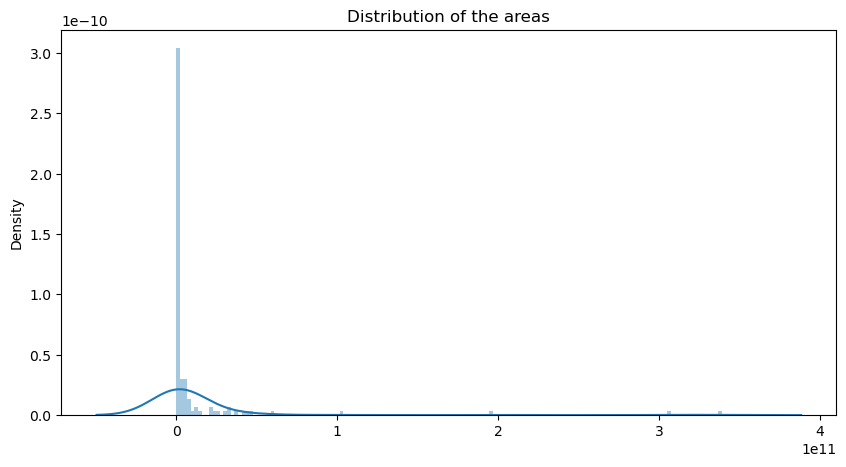

(93948558.5, 411070811.0, 3458997457.5, 338880868948.0)

In [ ]:
areas = df_region['Area'].values
#remove nan values

#plot the distribution of the areas
plt.figure(figsize=(10,5))
sns.distplot(areas, bins=150)
plt.title('Distribution of the areas')
plt.show()

#find the 25, 50 and 75 area percentile
area_25 = np.percentile(areas, 25)
area_50 = np.percentile(areas, 50)
area_75 = np.percentile(areas, 75)
area_100 = np.percentile(areas, 100)

area_25, area_50, area_75, area_100

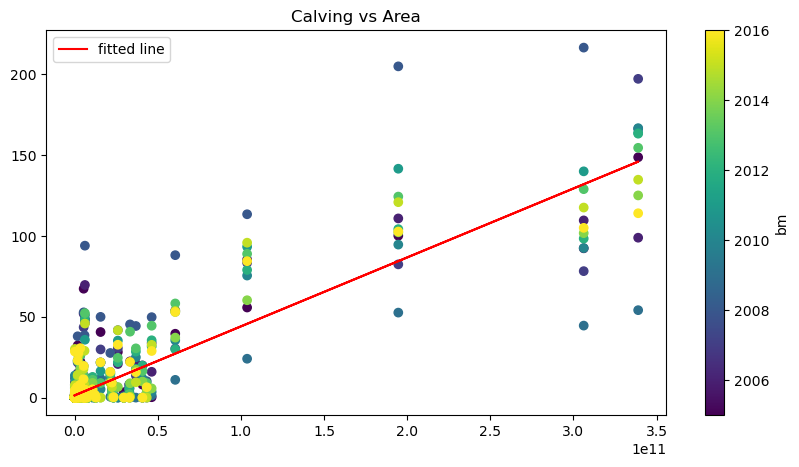

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create scatter plot for Calving vs Area
fig, ax = plt.subplots(figsize=(10, 5))
scatter_plot = ax.scatter(df_2['area'], df_2['calving'], c=common_years_repeated, cmap='viridis')
plt.title('Calving vs Area')

# Add colorbar
colorbar = plt.colorbar(scatter_plot)
colorbar.set_label('bm')

# Find the linear regression and its error and plot it
slope, intercept, r_value, p_value, std_err = stats.linregress(df_2['area'], df_2['calving'])
ax.plot(df_2['area'], intercept + slope * df_2['area'], 'r', label='fitted line')

plt.legend()
plt.show()


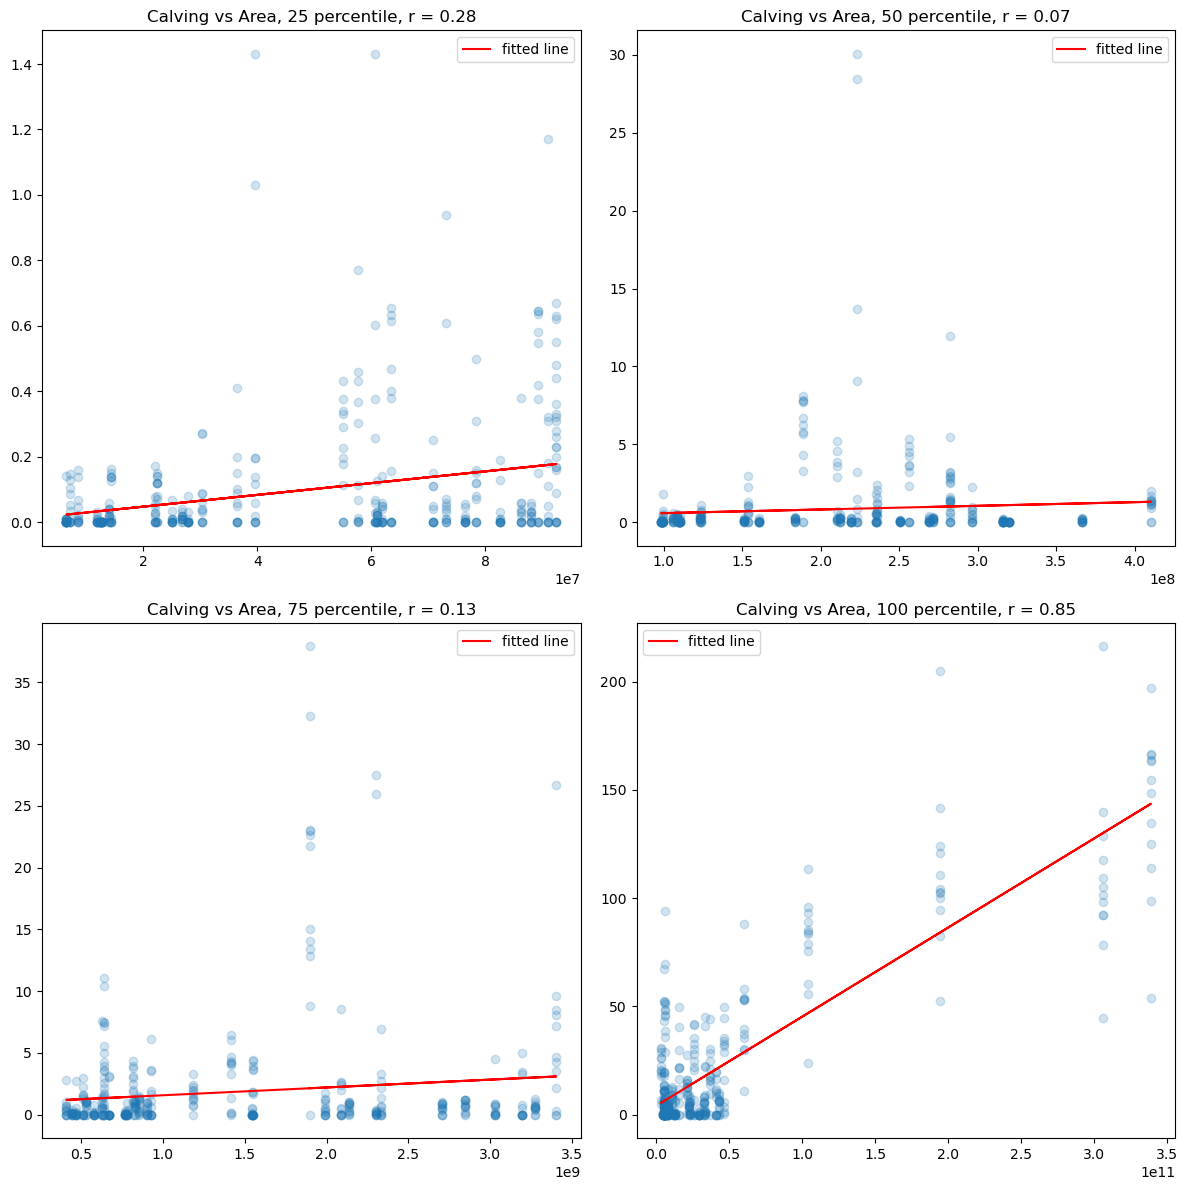

In [ ]:
#now i wnat to select the glaciers which are in the 25 percentile of the area

#select the glaciers which are in the 25 percentile of the area
df_25 = df_2[df_2['area'] <= area_25]
df_50 = df_2[(df_2['area'] <= area_50) & (df_2['area'] > area_25)]
df_75 = df_2[(df_2['area'] <= area_75) & (df_2['area'] > area_50)]
df_100 = df_2[df_2['area'] >= area_75]


#now plot the calving vs area for the 25 percentile, the 50 percentile, the 75 percentile and the 100 percentile 

percentili = [df_25, df_50, df_75, df_100]
percentile_names = ['25', '50', '75', '100']

# Create scatter plot for Calving vs Area, divided into 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Iterate over percentili and axes simultaneously
for i, (percentile, ax) in enumerate(zip(percentili, axes.flatten())):
    scatter_plot = ax.scatter(percentile['area'], percentile['calving'], alpha = 0.2)


    # Find the linear regression and its error and plot it
    slope, intercept, r_value, p_value, std_err = stats.linregress(percentile['area'], percentile['calving'])
    ax.plot(percentile['area'], intercept + slope * percentile['area'], 'r', label='fitted line')
    ax.set_title('Calving vs Area, ' + percentile_names[i] + ' percentile, r = ' + str(r_value)[:4])

    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## Trying a PCA analysis - first way



In [ ]:
bm_pca = bm.copy()
calving_pca = calving.copy()
i_c_pca = i_c.copy()
i_v_pca = i_v.copy()
p_t_pca = p_t.copy()
sal_pca = sal.copy()
i_t_pca = i_t.copy()

#do the average for each glacier, so on each line
datasets_pca = [bm_pca, calving_pca, i_c_pca, i_v_pca, p_t_pca, sal_pca, i_t_pca]

mean_pca = []
std_pca = []
vector_lenght = []

#normalize the data

for dataset in datasets_pca:
    mean_pca.append(dataset.mean(axis=1))
    std_pca.append(dataset.std(axis=1))
    #squared_sum = np.linalg.norm(dataset, axis=1)
    #vector_lenght.append(squared_sum) #correct, checked with values

#subtract the mean
for i in range(len(datasets_pca)): # indicates the variable

    for j in range(len(datasets_pca[i].columns)): # indicaes the glacier

        datasets_pca[i].iloc[:,j] = datasets_pca[i].iloc[:,j] - mean_pca[i] # correct, checked with values

#divide each element of the dataset by the vector lenght. Correct, checked with values
#for i, dataset in enumerate(datasets_pca):
#    datasets_pca[i] = dataset.div(vector_lenght[i], axis=0) #it does not sense to square it because we loose the sign


In [ ]:
datasets_pca[0]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
id,,,,,,,,,,,,
2.0,-2.392500,1.697500,-0.112500,3.997500,1.037500,-0.852500,-0.442500,-0.412500,-0.662500,-0.612500,-1.222500,-0.022500
3.0,0.010833,-0.029167,0.010833,0.020833,0.010833,-0.039167,-0.009167,0.000833,0.010833,0.020833,-0.009167,0.000833
4.0,0.825833,-0.664167,0.225833,-1.334167,1.025833,-0.054167,0.055833,-0.084167,0.095833,0.055833,-0.084167,-0.064167
6.0,-8.703333,11.946667,5.576667,-7.343333,-4.813333,-3.363333,-5.003333,18.656667,26.956667,-14.373333,-11.883333,-7.653333
7.0,-0.461667,-0.811667,-0.231667,0.158333,0.258333,-0.201667,0.338333,-0.751667,2.168333,0.438333,-0.541667,-0.361667
...,...,...,...,...,...,...,...,...,...,...,...,...
164.0,0.115833,-0.264167,-0.074167,0.195833,-0.204167,0.025833,-0.054167,-0.054167,-0.314167,-0.264167,0.175833,0.715833
166.0,-0.094167,-0.294167,0.275833,0.325833,-0.014167,-0.164167,-0.094167,0.175833,-0.034167,0.225833,-0.184167,-0.124167
169.0,-0.076667,0.273333,-0.046667,-0.106667,0.123333,0.013333,-0.006667,-0.046667,-0.026667,-0.026667,-0.026667,-0.046667


In [ ]:
listone_pca = []

for variable in datasets_pca:
    
        list_tmp = []
    
        for year in common_years:
            
            for id in bm_pca.index:
    
                list_tmp.append(variable.loc[id][str(year)])
    
        listone_pca.append(list_tmp)

print(np.shape(listone_pca))

(7, 1608)


In [ ]:
df_pca = pd.DataFrame(listone_pca).T

df_pca.columns = ['bm', 'calving', 'i_c', 'i_v', 'p_t', 'sal', 'i_t']

#Calculate the covariance matrix
cov = df_pca.cov()

cov #the diagonal is the variance

#calculate the autovector and the autovalues of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov)


In [ ]:
eig_vecs

array([[ 8.28356210e-03,  9.78781742e-01,  1.18249785e-02,
         1.97975188e-01, -5.08278495e-02,  4.56281084e-04,
         2.81936307e-05],
       [ 3.78713537e-03,  2.04636210e-01, -6.79407897e-02,
        -9.51657209e-01,  2.18726865e-01, -5.44116611e-04,
         7.40063501e-04],
       [ 4.08439783e-03, -5.26784467e-03, -6.95216349e-02,
        -2.19791785e-01, -9.72981613e-01,  7.27141283e-03,
        -8.23337896e-03],
       [ 9.99904096e-01, -8.88029407e-03, -9.11061974e-03,
         3.65561055e-03,  4.07062114e-03,  3.20777044e-05,
         3.54491462e-05],
       [ 4.94380014e-06,  2.50863135e-04, -2.11883993e-04,
         1.05711038e-03,  7.40071495e-03, -1.05547949e-01,
        -9.94386059e-01],
       [-5.50974107e-05, -2.70089647e-04,  1.29665643e-03,
         1.03688078e-03,  7.99837664e-03,  9.94387010e-01,
        -1.05487765e-01],
       [-9.59966584e-03, -1.89151314e-03, -9.95151361e-01,
         8.26462161e-02,  5.24075809e-02,  8.52425803e-04,
         5.9894506

In [ ]:
# now i want to reduce the dimensionality of the data, so i want to do a PCA

#first i need to standardize the data, so i need to divide each row by the standard deviation

for i, dataset in enumerate(datasets_pca):
    datasets_pca[i] = dataset.div(dataset.std(axis=0), axis=0)
